In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm

[[234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 ...
 [234 234 234 ... 210 171 155]
 [234 234 234 ... 153 209 181]
 [234 234 234 ... 156 153 176]]


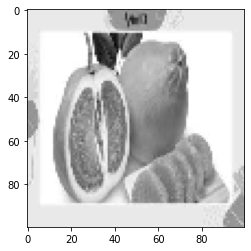

In [ ]:
datadir = "/content/drive/MyDrive/traicay"
categories=['buoi','chuoi','duahau','hongxiem','mangcut','thanhlong','saurieng','vaithieu','tao','vusua']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
#creating training data
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 10/10 [00:03<00:00,  2.86it/s]

119


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (119, 100, 100, 1)
y (119,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/traicay/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/traicay/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [ ]:
pickle_in = open("/content/drive/MyDrive/traicay/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/traicay/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (119, 100, 100, 1)
y (119,)


In [ ]:
y= to_categorical(y,11)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(11,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=30,batch_size=64,validation_split=0.1,verbose=1)

Epoch 1/30
2/2 [==============================] - 8s 3s/step - loss: 6.9054 - accuracy: 0.0561 - val_loss: 20.0585 - val_accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 6s 3s/step - loss: 4.9477 - accuracy: 0.0935 - val_loss: 5.4741 - val_accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 6s 2s/step - loss: 2.3946 - accuracy: 0.1215 - val_loss: 3.7864 - val_accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 6s 3s/step - loss: 2.2573 - accuracy: 0.1869 - val_loss: 3.3473 - val_accuracy: 0.0000e+00
Epoch 5/30
2/2 [==============================] - 6s 2s/step - loss: 2.1770 - accuracy: 0.1963 - val_loss: 4.0213 - val_accuracy: 0.0000e+00
Epoch 6/30
2/2 [==============================] - 6s 2s/step - loss: 2.1175 - accuracy: 0.1869 - val_loss: 4.2837 - val_accuracy: 0.0000e+00
Epoch 7/30
2/2 [==============================] - 6s 3s/step - loss: 1.9822 - accuracy: 0.4486 - val_loss: 4.4247 - val_accuracy: 0.0000e+00
Epoch 8/30
2

In [ ]:
model.save('Traicay.h5')

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation duahau


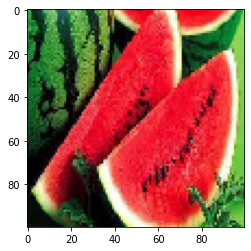

In [ ]:
labels = {0: 'buoi',
          1: 'chuoi',
          2: 'duahau',
          3: 'hongxiem',
          4: 'mangcut',
          5: 'tao',
          6: 'saurieng',
          7: 'vaithieu',
          8: 'thanhlong',
          9: 'vusua',          
          }
model = load_model('Traicay.h5')
	# load model
img = load_image('/content/drive/MyDrive/traicay/duahau/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation buoi


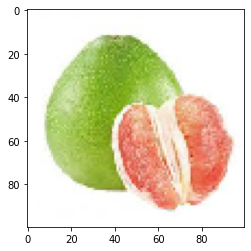

In [ ]:
labels = {0: 'buoi',
          1: 'chuoi',
          2: 'duahau',
          3: 'hongxiem',
          4: 'mangcut',
          5: 'tao',
          6: 'saurieng',
          7: 'vaithieu',
          8: 'thanhlong',
          9: 'vusua',          
          }
model = load_model('Traicay.h5')
	# load model
img = load_image('/content/drive/MyDrive/traicay/buoi/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation chuoi


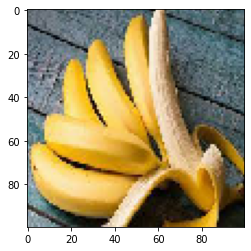

In [ ]:
labels = {0: 'buoi',
          1: 'chuoi',
          2: 'duahau',
          3: 'hongxiem',
          4: 'mangcut',
          5: 'tao',
          6: 'saurieng',
          7: 'vaithieu',
          8: 'thanhlong',
          9: 'vusua',          
          }
model = load_model('Traicay.h5')
	# load model
img = load_image('/content/drive/MyDrive/traicay/chuoi/9.jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Traicay.ipynb')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--2022-05-25 14:58:42--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2022-05-25 14:58:43 (39.1 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Traicay.ipynb to pdf
[NbConvertApp] Support files will be in Traicay_files/
[NbConvertApp] Making directory ./Traicay_files
[NbConvertApp] Making directory ./Traicay_files
[NbCo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'